# Model Comparison

In [1]:
import pandas as pd
import json
import os
from Plotting import json_to_df,Create_Array_from_Rev,plot_Revenue_Test

Open the result json files:


In [2]:
desktop_path = os.path.expanduser("~/Desktop")

In [3]:
os.chdir(desktop_path+'\Thesis\lightenup')
current_directory = os.getcwd() # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...
df_Exp_rev = json_to_df(current_directory + '\\Results\\' + 'Exp_revenue - Copy.json')
df_RT_rev = json_to_df(current_directory + '\\Results\\' + 'RT_revenue - Copy.json')


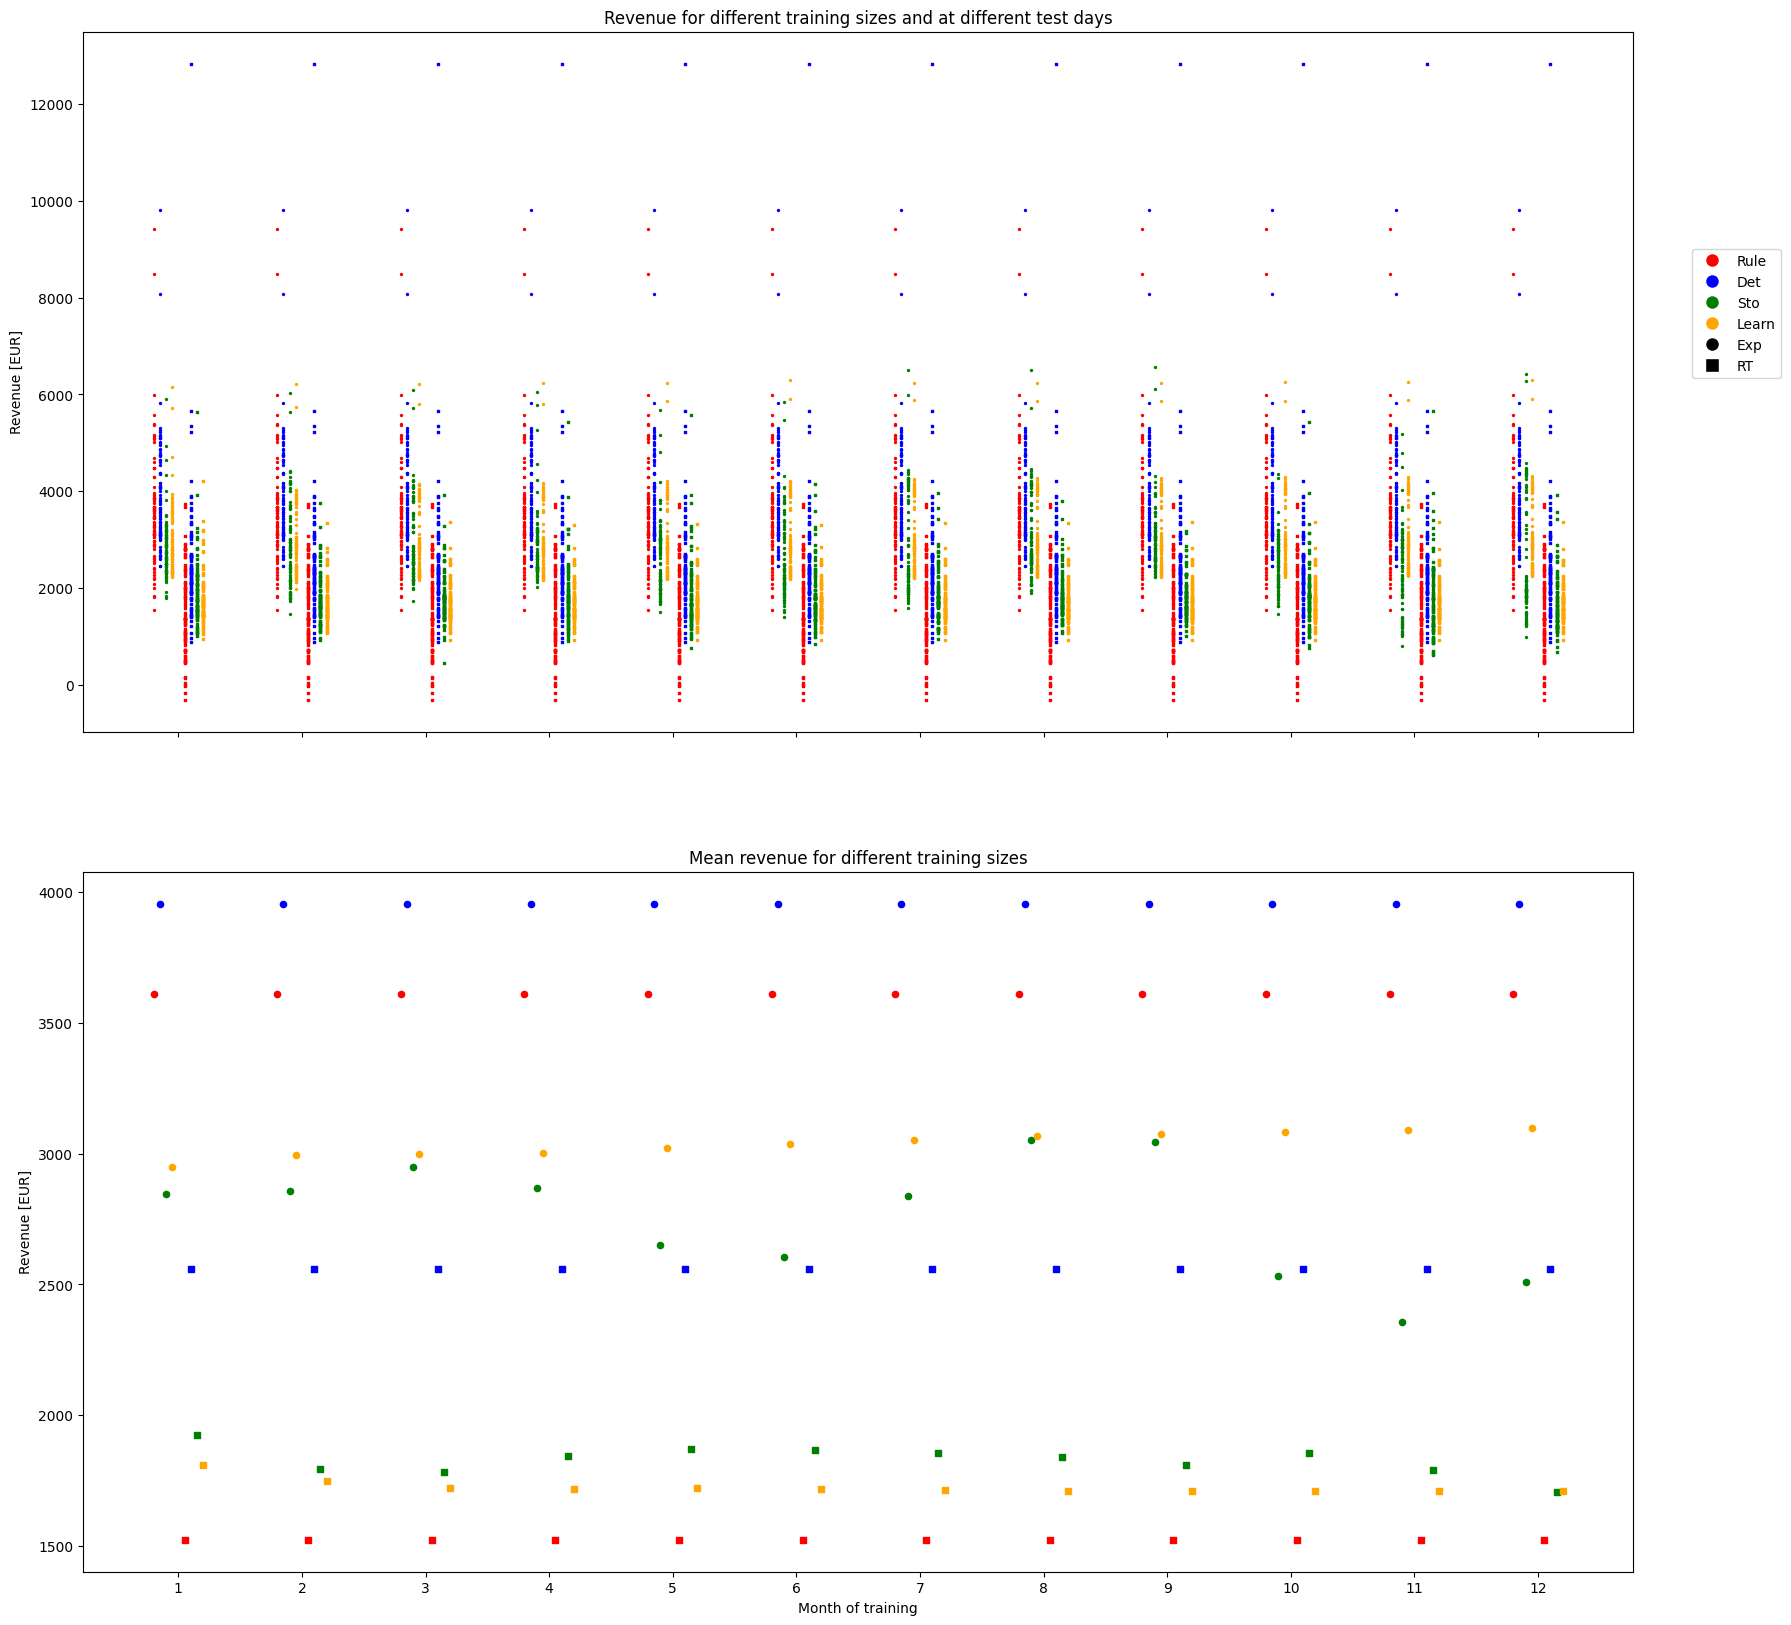

In [4]:
# Summary results
Array = Create_Array_from_Rev(df_Exp_rev,df_RT_rev)
plot_Revenue_Test(Array)